# CNN Spam Detection

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

X = df['v2'].to_numpy()
y = df['v1'].map({'ham': 0, 'spam': 1}).to_numpy()
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.33)

MAX_VOCAB_SIZE = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train_texts)
X_train = tokenizer.texts_to_sequences(X_train_texts)
X_test = tokenizer.texts_to_sequences(X_test_texts)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train)
T = X_train.shape[1]
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=T)

V = len(tokenizer.word_index)
D = 20

Epoch 1/5
117/117 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8634 - val_loss: 0.3406 - val_accuracy: 0.8711
Epoch 2/5
117/117 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9314 - val_loss: 0.0948 - val_accuracy: 0.9782
Epoch 3/5
117/117 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0606 - val_accuracy: 0.9831
Epoch 4/5
117/117 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0593 - val_accuracy: 0.9821
Epoch 5/5
117/117 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0628 - val_accuracy: 0.9826


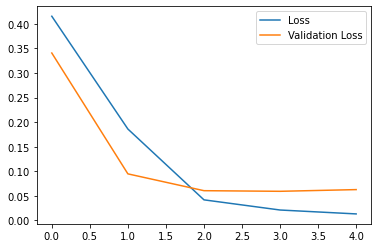

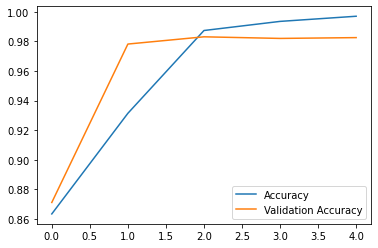

58/58 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9826
Accuracy: 0.9825992584228516


In [4]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Embedding(V + 1, D)(i)
x = tf.keras.layers.Conv1D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPool1D(3)(x)
x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPool1D(3)(x)
x = tf.keras.layers.Conv1D(128, 3, activation='relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=5)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Display a misclassified sentence

In [5]:
labels = ['Ham', 'Spam']
p_test = np.rint(model.predict(X_test).flatten()).astype(np.int)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(f'Sentence: {X_test_texts[i]}')
print(f'Truth: {labels[y_test[i]]}\nPredicted: {labels[p_test[i]]}')

Sentence: XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
Truth: Spam
Predicted: Ham
